#Personal face recognition using SVM

## Install open CV

In [33]:
pip install numpy opencv-python scikit-learn

In [34]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display an image to test if the mount is successful

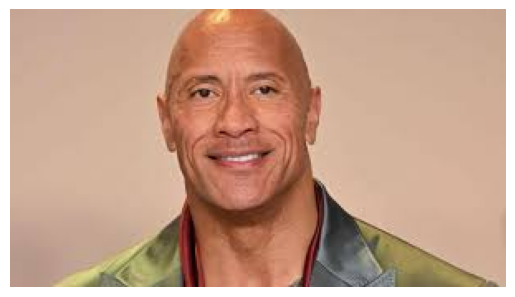

In [36]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Images/Test/r6.jpeg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

## Create a function to load your images from your google drive folder

In [37]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images/')

In [38]:
images.shape

(12, 10000)

In [39]:
labels.shape

(12,)

In [40]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

## Split your data

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)


## Train your model

In [42]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)


SVC()

## Evaluate your model

In [43]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 0.00%


## Test your model using images that are not in the training data

In [44]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/Images/Test/h6.jpeg', model)
print(f'Predicted label:', result)


Predicted label: [0]
